<a href="https://colab.research.google.com/github/qor0530/fontFinding/blob/main/fontfinding_to_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (49.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129504 files and dir

In [ ]:
 #cnn 예제

 import sys
 import tensorflow as tf
 import keras
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Flatten
 from keras.layers.convolutional import Conv2D, MaxPooling2D
 import numpy as np

 img_rows = 28
 img_cols = 28

 (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

 input_shape = (img_rows, img_cols, 1)
 x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
 x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

 x_train = x_train.astype('float32') / 255.
 x_test = x_test.astype('float32') / 255.

 print('x_train shape:', x_train.shape)
 print(x_train.shape[0], 'train samples')
 print(x_test.shape[0], 'test samples')

 batch_size = 128
 num_classes = 10
 epochs = 1 #여러번 학습하면 좋겠지만 시간관계상 3번만 학습하고 결과를 확인합니다.

 y_train = keras.utils.to_categorical(y_train, num_classes)
 y_test = keras.utils.to_categorical(y_test, num_classes)

 model = Sequential()
 model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
 model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
 model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.25))
 model.add(Flatten())
 model.add(Dense(1000, activation='relu'))
 model.add(Dropout(0.5))
 model.add(Dense(num_classes, activation='softmax'))
 model.summary()

 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

 score = model.evaluate(x_test, y_test, verbose=0)
 print('Test loss:', score[0])
 print('Test accuracy:', score[1])

In [ ]:
#학습 딥러닝



ValueError: ignored

[Image          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
 Image size                                                 64,64
 Glyph id                                                     985
 Weight                                                      Book
 Family Name                                     GoyangDeogyang B
 Bound                               [65.0, -182.0, 908.0, 758.0]
 Width                                                        920
 Copyright      Copyright (c) 2018 by Goyang. All rights reser...
 Version                                                    1.000
 Font name                                       GOYANGDEOGYANG B
 Unicode                                                    44032
 VWidth                                                      1000
 SFD            SplineSet\n758 311 m 1,0,-1\n 758 -182 l 1,1,-...
 Contour num                                                    2
 TTFWeight                                                    400
 Name: 0, 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_te

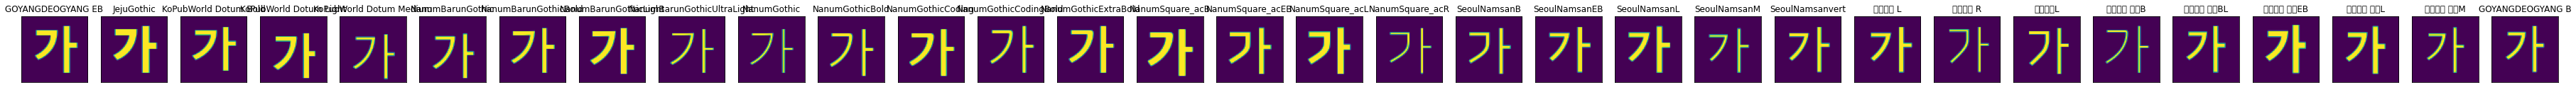

In [48]:
#테스트

import numpy as np
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

unicode = 44032 #추출한 한글의 유니코드

for i in range(1,33):
  df = pd.read_parquet(f'/content/drive/MyDrive/hangul-font-dataset-main/gothic/{i}.pq')
  fontobj.append(df.loc[unicode - 44032])
fig = plt.figure(figsize=(64, 64))
for i in range(1,33):
  fontImage = fontobj[i-1][0]
  image = Image.fromarray(fontImage.reshape([64, 64]))
  ax1 = fig.add_subplot(1, 32, i)
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.set_title(f'{fontobj[i][9]}')
  ax1.imshow(image)
